In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os

fil_path = "../data/srt/srt_csv/"
dir_list = os.listdir(fil_path)

''' Settings '''
sns.set_style("white")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

''' Load and concatinate CSV files into single dataframe'''

files=[]
for path in dir_list:
    files.append(
        pd.read_csv(fil_path+path,index_col=0)
    )
df_sub = pd.concat(files)

csv_names = ['../data/imdb_unique_prod-2018-04-21_0924.csv']
files = []
for path in csv_names:
    files.append(
        pd.read_csv(path,index_col=0)
    )
df_movies = pd.concat(files)
df_movies = df_movies.loc[:, ~df_movies.columns.str.contains('^Unnamed')]

cols = df_movies.columns.tolist()
cols = cols[-2:] + cols[:-2]
df_movies = df_movies[cols]

# Drop null values
#df_movies = df_movies[(df_movies['imdb_popularity'].notnull())]
#df_movies['imdb_popularity'] = df_movies['imdb_popularity'].dropna()
len(df_movies[df_movies['gross_usa'].isnull()])
#df_movies.head(5)

624

In [10]:
df_movies_missing = df_movies[df_movies['gross_usa'].isnull()]
df_movies_missing.head(5)

,title,year,budget,cast,color,country,description,director,genre,gross_usa,gross_usa_weekend,gross_worldwide,imdb_critic_reviews_total,imdb_popularity,imdb_rating,imdb_ratings_total,imdb_user_reviews_total,language,metacritic_rating,mpaa_rating,poster_image,production_co,release_date,runtime
1,A Woman Under the Influence,1974,NaN,"Peter Falk,Gena Rowlands,Fred Draper,Lady Rowl...",Color,USA,Peter Falk is a blue collar man trying to deal...,John Cassavetes,"Drama, Romance",NaN,NaN,NaN,85.0,NaN,8.2,"16,465",99,English,NaN,R,https://ia.media-imdb.com/images/M/MV5BYTRkZDR...,Faces,18 November 1974 (USA),155.0
4,Solaris,1972,"RUR 1,000,000","Natalya Bondarchuk,Donatas Banionis,Jüri Järve...",Black and White,Soviet Union,The Solaris mission has established a base on ...,Andrei Tarkovsky,"Drama, Mystery, Sci-Fi",NaN,NaN,NaN,173.0,"2,543",8.1,"63,833",253,Russian,90.0,PG,https://ia.media-imdb.com/images/M/MV5BZmY4Yjc...,Mosfilm,26 September 1972 (Czechoslovakia),167.0
7,Dillinger,1973,"$1,000,000","Warren Oates,Ben Johnson,Michelle Phillips,Clo...",Black and White,USA,After a shoot-out kills five FBI agents in Kan...,John Milius,"Action, Biography, Crime, Drama",NaN,NaN,NaN,35.0,NaN,7.0,"3,916",58,English,NaN,R,https://ia.media-imdb.com/images/M/MV5BMTcyMTE...,American International Pictures (AIP),8 November 1973 (Hong Kong),107.0
8,10 Rillington Place,1971,NaN,"Richard Attenborough,Judy Geeson,John Hurt,Pat...",Color,UK,"London, 1949.",Richard Fleischer,"Biography, Crime, Drama",NaN,NaN,NaN,55.0,NaN,7.6,"6,149",81,English,NaN,GP,https://ia.media-imdb.com/images/M/MV5BYzc4NDV...,Columbia Pictures,29 January 1971 (UK),111.0
9,The Homecoming,1973,NaN,"Paul Rogers,Ian Holm,Cyril Cusack,Terence Rigb...",Color,UK,Max is a surly pensioner who alternately vener...,Peter Hall,Drama,NaN,NaN,NaN,10.0,NaN,7.1,555,13,English,NaN,PG,https://ia.media-imdb.com/images/M/MV5BNzhkM2Y...,Cinévision Ltée,16 April 1977 (France),111.0


In [3]:
# Import numbers

csv_names = ['../data/numbers_worldwide-1-5.csv','../data/numbers_worldwide-6-50.csv']
files = []
for path in csv_names:
    files.append(
        pd.read_csv(path,index_col=0)
    )
df_numbers = pd.concat(files)
#df_numbers = df_numbers.reset_index()
#df_numbers['title'] = df_numbers['title'].str.replace(r"\(.*\)","")
#df_numbers[df_numbers['title'].str.contains('Casino')]
df_all = pd.merge(df_movies_missing,df_numbers[['numbers_gross_domestic']], on='title')
df_all


KeyError: 'title'

In [11]:
''' Parse numerics'''
# Drop rows with null values
df_movies = df_movies[(df_movies['budget'].notnull())]
df_movies = df_movies[(df_movies['gross_usa'].notnull())]
df_movies = df_movies[(df_movies['gross_usa_weekend'].notnull())]
df_movies = df_movies[(df_movies['gross_worldwide'].notnull())]
df_movies = df_movies[(df_movies['imdb_rating'].notnull())]
#df_movies = df_movies[(df_movies['metacritic_rating'].notnull())]
#df_movies = df_movies[(df_movies['imdb_popularity'].notnull())]

# Convert data types
df_movies['imdb_popularity'] = pd.to_numeric(df_movies['imdb_popularity'], errors='coerce').astype(float)
df_movies['year'] =  df_movies['year'].astype(int)
#df_movies['imdb_popularity'] = df_movies['imdb_popularity'].dropna()
#df_movies['imdb_critic_reviews_total'] = pd.to_numeric(df_movies['imdb_critic_reviews_total'], errors='coerce').astype(int)
#df_movies['imdb_user_reviews_total'] = pd.to_numeric(df_movies['imdb_user_reviews_total'], errors='coerce').astype(int)
df_movies.head(5)

,title,year,budget,cast,color,country,description,director,genre,gross_usa,gross_usa_weekend,gross_worldwide,imdb_critic_reviews_total,imdb_popularity,imdb_rating,imdb_ratings_total,imdb_user_reviews_total,language,metacritic_rating,mpaa_rating,poster_image,production_co,release_date,runtime
0,The Godfather,1972,"$6,000,000","Marlon Brando,Al Pacino,James Caan,Richard S. ...",Color,USA,When the aging head of a famous crime family d...,Francis Ford Coppola,"Crime, Drama","$134,966,411,","$302,393","$245,066,411",223.0,111.0,9.2,"1,328,623","2,707",English,100.0,R,https://ia.media-imdb.com/images/M/MV5BM2MyNjY...,Paramount Pictures,24 March 1972 (USA),175.0
20,Superman,1978,"$55,000,000","Marlon Brando,Gene Hackman,Christopher Reeve,N...",Color,USA,Just before the destruction of the planet Kryp...,Richard Donner,"Action, Adventure, Drama, Sci-Fi","$134,218,018","$7,465,343","$166,200,000",176.0,NaN,7.3,"140,063",517,English,86.0,PG,https://ia.media-imdb.com/images/M/MV5BOWU0ZGE...,Dovemead Films,15 December 1978 (USA),143.0
34,La Cage aux Folles,1978,"FRF 7,000,000","Ugo Tognazzi,Michel Serrault,Claire Maurier,Ré...",Color,France,Two gay men living in St. Tropez have their li...,Édouard Molinaro,Comedy,"$20,424,259","$18,709","$21,400,826",31.0,NaN,7.3,"8,367",41,French,NaN,R,https://ia.media-imdb.com/images/M/MV5BNzBiZTQ...,Da Ma Produzione,30 March 1979 (USA),91.0
43,Alien,1979,"$11,000,000","Tom Skerritt,Sigourney Weaver,Veronica Cartwri...",Color,UK,"In the distant future, the crew of the commerc...",Ridley Scott,"Horror, Sci-Fi","$78,900,000","$3,527,881","$203,630,630",424.0,340.0,8.5,"663,691","1,233",English,83.0,R,https://ia.media-imdb.com/images/M/MV5BNDNhN2I...,Brandywine Productions,22 June 1979 (USA),116.0
48,The Spy Who Loved Me,1977,"$14,000,000","Roger Moore,Barbara Bach,Curd Jürgens,Richard ...",Color,UK,James Bond is back again and his new mission i...,Lewis Gilbert,"Action, Adventure, Thriller","$46,800,000","$1,347,927","$185,400,000",111.0,NaN,7.1,"84,603",289,English,NaN,PG,https://ia.media-imdb.com/images/M/MV5BNDk3ODM...,Eon Productions,3 August 1977 (USA),125.0


In [12]:
from currency_converter import CurrencyConverter
from re import sub
import math

c = CurrencyConverter()

def parse_currency(value):
    value = str(value)
    currency_type = sub(r'[?!^\d.]', '', value ).replace(',','').rstrip()
    currency_amount = sub(r'[^\d.]', '', value)
    if currency_type == "$":
        currency_type = 'USD'
    if currency_type == "€":
        currency_type = 'EUR'
    if currency_type == "£":
        currency_type = 'GBP'
    if currency_type == "RUR":
        currency_type = 'USD'
    if currency_type == "FRF":
        currency_type = 'EUR'
    if currency_type == "DEM":
        currency_type = 'EUR'
    if currency_type == "":
        currency_type = 'USD'        
    return int(math.ceil(c.convert(currency_amount, currency_type, 'USD')))
    
        


#df_movies = df_movies[df_movies['gross_usa'].notnull()]
#df_movies['gross_usa'] = df_movies['gross_usa'].apply(clean_imdb_box_office)
df_movies['budget'] = df_movies['budget'].apply(parse_currency)
df_movies['gross_usa'] = df_movies['gross_usa'].apply(parse_currency)
df_movies['gross_usa_weekend'] = df_movies['gross_usa_weekend'].apply(parse_currency)
df_movies['gross_worldwide'] = df_movies['gross_worldwide'].apply(parse_currency)

df_movies.head(5)
#df_movies

,title,year,budget,cast,color,country,description,director,genre,gross_usa,gross_usa_weekend,gross_worldwide,imdb_critic_reviews_total,imdb_popularity,imdb_rating,imdb_ratings_total,imdb_user_reviews_total,language,metacritic_rating,mpaa_rating,poster_image,production_co,release_date,runtime
0,The Godfather,1972,6000000,"Marlon Brando,Al Pacino,James Caan,Richard S. ...",Color,USA,When the aging head of a famous crime family d...,Francis Ford Coppola,"Crime, Drama",134966411,302393,245066411,223.0,111.0,9.2,"1,328,623","2,707",English,100.0,R,https://ia.media-imdb.com/images/M/MV5BM2MyNjY...,Paramount Pictures,24 March 1972 (USA),175.0
20,Superman,1978,55000000,"Marlon Brando,Gene Hackman,Christopher Reeve,N...",Color,USA,Just before the destruction of the planet Kryp...,Richard Donner,"Action, Adventure, Drama, Sci-Fi",134218018,7465343,166200000,176.0,NaN,7.3,"140,063",517,English,86.0,PG,https://ia.media-imdb.com/images/M/MV5BOWU0ZGE...,Dovemead Films,15 December 1978 (USA),143.0
34,La Cage aux Folles,1978,8724800,"Ugo Tognazzi,Michel Serrault,Claire Maurier,Ré...",Color,France,Two gay men living in St. Tropez have their li...,Édouard Molinaro,Comedy,20424259,18709,21400826,31.0,NaN,7.3,"8,367",41,French,NaN,R,https://ia.media-imdb.com/images/M/MV5BNzBiZTQ...,Da Ma Produzione,30 March 1979 (USA),91.0
43,Alien,1979,11000000,"Tom Skerritt,Sigourney Weaver,Veronica Cartwri...",Color,UK,"In the distant future, the crew of the commerc...",Ridley Scott,"Horror, Sci-Fi",78900000,3527881,203630630,424.0,340.0,8.5,"663,691","1,233",English,83.0,R,https://ia.media-imdb.com/images/M/MV5BNDNhN2I...,Brandywine Productions,22 June 1979 (USA),116.0
48,The Spy Who Loved Me,1977,14000000,"Roger Moore,Barbara Bach,Curd Jürgens,Richard ...",Color,UK,James Bond is back again and his new mission i...,Lewis Gilbert,"Action, Adventure, Thriller",46800000,1347928,185400000,111.0,NaN,7.1,"84,603",289,English,NaN,PG,https://ia.media-imdb.com/images/M/MV5BNDk3ODM...,Eon Productions,3 August 1977 (USA),125.0


In [13]:
# Calculate length of line dialogue 
df_sub['line_duration'] = df_sub['endTime'] - df_sub['startTime']

# Calculate length of line dialogue
# THIS LINE TOTALLY CHNAGES GRAPHS, IF SHIFT IS 1 vs -1
df_sub['line_delta'] = df_sub['startTime'] - df_sub['endTime'].shift(1)
df_sub['line_delta'] = df_sub['line_delta'].fillna(0).astype(int)
df_movies['genre'] = df_movies['genre'].dropna()

# Fix dupliacte index TODO: WHY IS THIS HAPPENING?
#df_movies = df_movies.reset_index()

# Create dummy variables
#df_movies['genre'] = df_movies['genre'].str.get_dummies(sep=',').add_prefix('genre_')
#df_movies[] = pd.get_dummies(df_movies['genre'])

# Merge subtitle and movie dataframe
df_test = pd.merge(df_sub, df_movies[['title','year','genre','budget','imdb_rating','imdb_popularity','color','director','country','metacritic_rating','mpaa_rating','gross_usa','gross_usa_weekend','gross_worldwide']], on='title')
df_test = df_test.groupby('title').agg(lambda x: x[x>0].mean()).reset_index()
#df_movies.index.get_duplicates()
df_test
#df_movies

,title,startTime,endTime,line_duration,line_delta,year,budget,imdb_rating,imdb_popularity,metacritic_rating,gross_usa,gross_usa_weekend,gross_worldwide
0,101 Dalmatians,2.744e+06,2.747e+06,2766.305,4178.950,1996,75000000,5.7,NaN,NaN,136189294,45073479,320689294
1,12 Years a Slave,3.806e+06,3.808e+06,2086.765,3266.731,2013,20000000,8.1,667.0,NaN,56671993,923715,187733202
2,13 Hours,3.824e+06,3.826e+06,1859.239,1662.304,2016,50000000,7.3,185.0,NaN,52853219,16000000,69411370
3,2 Fast 2 Furious,3.092e+06,3.094e+06,2251.820,3314.502,2003,76000000,5.9,NaN,NaN,127154901,50472480,107376378
4,2 Guns,2.942e+06,2.944e+06,1787.000,1975.299,2013,61000000,6.7,NaN,NaN,75612460,27059130,131940411
5,21 Jump Street,3.117e+06,3.119e+06,1991.098,1187.751,2012,42000000,7.2,NaN,69.0,138447667,36302612,201585328
6,27 Dresses,3.153e+06,3.155e+06,2810.894,729.845,2008,30000000,6.1,631.0,NaN,76808654,27442040,160259319
7,3 Idiots,4.984e+06,4.987e+06,2574.651,2125.816,2009,8564290,8.4,NaN,NaN,6532908,1645502,80000000
8,3 Men and a Baby,2.840e+06,2.843e+06,2940.515,1286.517,1987,11000000,5.9,NaN,61.0,167780960,10384392,242780960
9,300: Rise of an Empire,2.548e+06,2.551e+06,2575.330,5100.167,2014,110000000,6.2,NaN,NaN,106580051,45038460,337580051


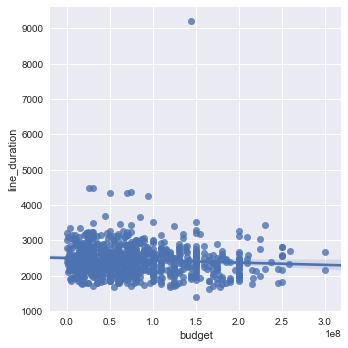

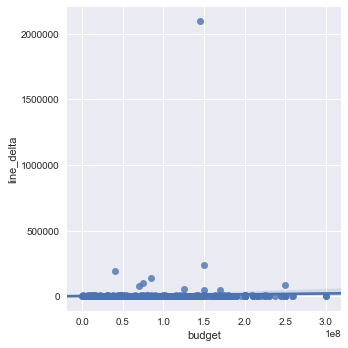

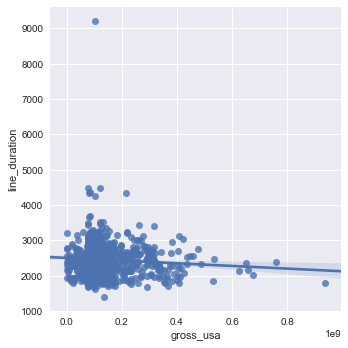

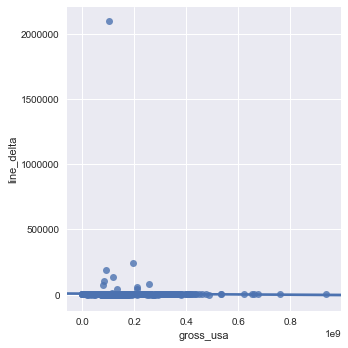

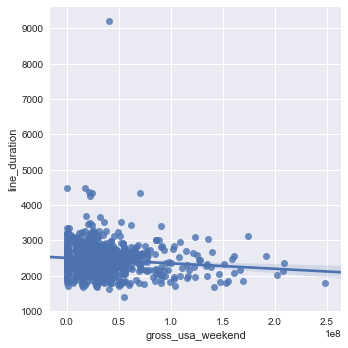

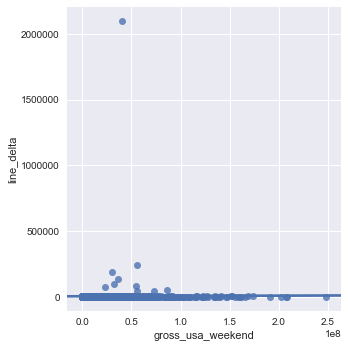

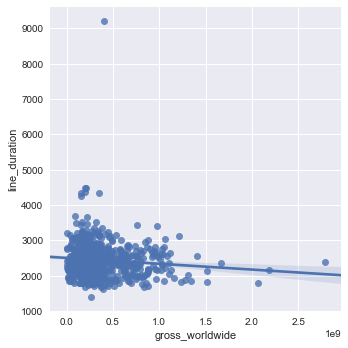

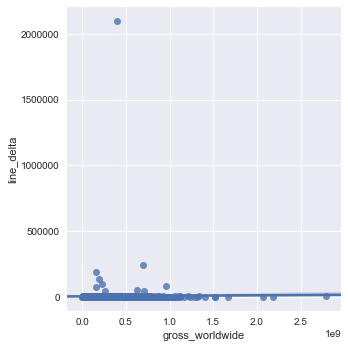

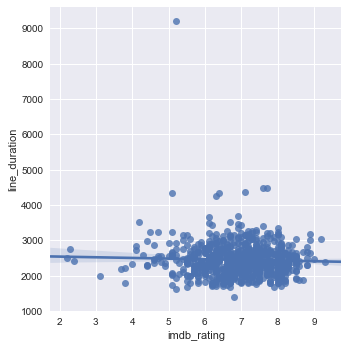

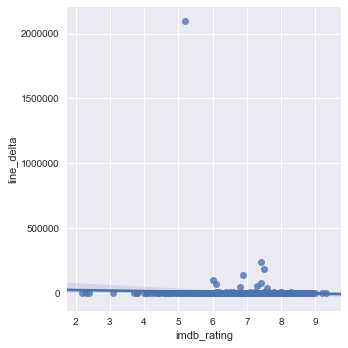

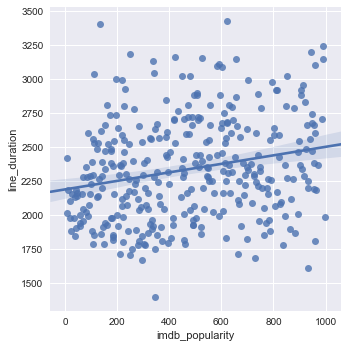

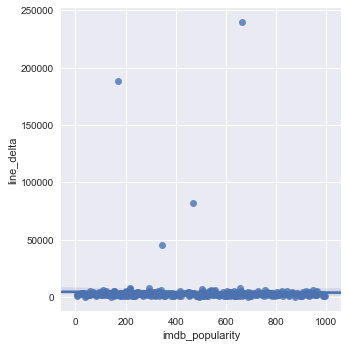

In [14]:
from matplotlib import rcParams

plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
rcParams['figure.figsize'] = 11.7,8.27
#df_test = df_test[(df_test['budget'] < 500000000) & (df_test['gross_usa'] < 4000000000) & (df_test['gross_usa_weekend'] < 500000000) & (df_test['gross_worldwide'] < 100000000) & (df_test['imdb_rating'] < 8)]

sns.lmplot(x='budget',y='line_duration',data=df_test,fit_reg=True) 
sns.lmplot(x='budget',y='line_delta',data=df_test,fit_reg=True) 


sns.lmplot(x='gross_usa',y='line_duration',data=df_test,fit_reg=True) 
sns.lmplot(x='gross_usa',y='line_delta',data=df_test,fit_reg=True) 


sns.lmplot(x='gross_usa_weekend',y='line_duration',data=df_test,fit_reg=True) 
sns.lmplot(x='gross_usa_weekend',y='line_delta',data=df_test,fit_reg=True) 

sns.lmplot(x='gross_worldwide',y='line_duration',data=df_test,fit_reg=True) 
sns.lmplot(x='gross_worldwide',y='line_delta',data=df_test,fit_reg=True) 

sns.lmplot(x='imdb_rating',y='line_duration',data=df_test,fit_reg=True) 
sns.lmplot(x='imdb_rating',y='line_delta',data=df_test,fit_reg=True) 

sns.lmplot(x='imdb_popularity',y='line_duration',data=df_test,fit_reg=True) 
sns.lmplot(x='imdb_popularity',y='line_delta',data=df_test,fit_reg=True) 


In [15]:
df_r = df_test[['year','startTime','endTime','line_duration','line_delta','imdb_rating']]
df_r

,year,startTime,endTime,line_duration,line_delta,imdb_rating
0,1996,2.744e+06,2.747e+06,2766.305,4178.950,5.7
1,2013,3.806e+06,3.808e+06,2086.765,3266.731,8.1
2,2016,3.824e+06,3.826e+06,1859.239,1662.304,7.3
3,2003,3.092e+06,3.094e+06,2251.820,3314.502,5.9
4,2013,2.942e+06,2.944e+06,1787.000,1975.299,6.7
5,2012,3.117e+06,3.119e+06,1991.098,1187.751,7.2
6,2008,3.153e+06,3.155e+06,2810.894,729.845,6.1
7,2009,4.984e+06,4.987e+06,2574.651,2125.816,8.4
8,1987,2.840e+06,2.843e+06,2940.515,1286.517,5.9
9,2014,2.548e+06,2.551e+06,2575.330,5100.167,6.2


In [16]:
''' Merge tables for regression'''
df_reg = pd.merge(df_sub, df_movies[['title','year','genre','budget','imdb_rating','imdb_popularity','color','director','country','metacritic_rating','mpaa_rating']], on='title')
df_reg.head(5)

,startTime,endTime,text,title,line_duration,line_delta,year,genre,budget,imdb_rating,imdb_popularity,color,director,country,metacritic_rating,mpaa_rating
0,99819,101480,Good morning.,Beverly Hills Chihuahua,1661,0,2008,"Adventure, Comedy, Drama, Family, Romance",20000000,3.8,NaN,Color,Raja Gosnell,USA,NaN,PG
1,102188,104179,"Oh, hello who likes to see you.",Beverly Hills Chihuahua,1991,708,2008,"Adventure, Comedy, Drama, Family, Romance",20000000,3.8,NaN,Color,Raja Gosnell,USA,NaN,PG
2,104690,105679,"Oh, look there is.",Beverly Hills Chihuahua,989,511,2008,"Adventure, Comedy, Drama, Family, Romance",20000000,3.8,NaN,Color,Raja Gosnell,USA,NaN,PG
3,106192,107056,Is she?,Beverly Hills Chihuahua,864,513,2008,"Adventure, Comedy, Drama, Family, Romance",20000000,3.8,NaN,Color,Raja Gosnell,USA,NaN,PG
4,108794,110091,"Dude, if I would be nervous.",Beverly Hills Chihuahua,1297,1738,2008,"Adventure, Comedy, Drama, Family, Romance",20000000,3.8,NaN,Color,Raja Gosnell,USA,NaN,PG


In [17]:

df_test.corr()

,startTime,endTime,line_duration,line_delta,year,budget,imdb_rating,imdb_popularity,metacritic_rating,gross_usa,gross_usa_weekend,gross_worldwide
startTime,1.000,1.000,0.063,0.117,-0.112,0.141,0.351,-0.131,0.283,0.147,0.069,0.189
endTime,1.000,1.000,0.064,0.118,-0.112,0.141,0.351,-0.131,0.283,0.147,0.069,0.189
line_duration,0.063,0.064,1.000,0.493,-0.300,-0.080,-0.039,0.230,-0.032,-0.080,-0.108,-0.100
line_delta,0.117,0.118,0.493,1.000,0.019,0.051,-0.053,-0.011,-0.026,-0.014,0.010,0.015
year,-0.112,-0.112,-0.300,0.019,1.000,0.364,-0.168,-0.207,-0.208,0.124,0.324,0.209
budget,0.141,0.141,-0.080,0.051,0.364,1.000,-0.057,-0.066,-0.119,0.534,0.667,0.641
imdb_rating,0.351,0.351,-0.039,-0.053,-0.168,-0.057,1.000,-0.103,0.568,0.182,-0.035,0.180
imdb_popularity,-0.131,-0.131,0.230,-0.011,-0.207,-0.066,-0.103,1.000,-0.089,-0.122,-0.112,-0.184
metacritic_rating,0.283,0.283,-0.032,-0.026,-0.208,-0.119,0.568,-0.089,1.000,0.110,-0.081,0.100
gross_usa,0.147,0.147,-0.080,-0.014,0.124,0.534,0.182,-0.122,0.110,1.000,0.782,0.900


In [ ]:

import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df_test[df_test['year'] > 1950],size = 4)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
df_r = df_r[['year','line_duration','line_delta']]
# Create an empty model
lr = LinearRegression()
df_r = df_r[df_r['year'] > 1940]
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_r.iloc[:,1:]
# Choose the response variable(s)
y = df_r.iloc[:,0]
# Fit the model to the full dataset
lr.fit(X,y)
# Print out the R^2 for the model against the full dataset


model = ols("line_duration ~ year", data=df_r).fit()
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)
lr.score(X,y)

In [ ]:
lsm = smf.ols('year~ line_delta + line_duration + imdb_rating', data = df_r)
fit1 = lsm.fit()
fit1.summary()


In [ ]:
fit1.resid.plot(style='o', figsize=(12,8))